In [1]:
import solver.Erasure_machine as em
import sampler.Spin_model as samp
import calculator.Spin_calculator as cal

import matplotlib.pyplot as plt
import numpy as np
import torch
import time

## model : 2D-Ising model

In [2]:
T = np.arange(3.5,1.0,-0.1)
eq_T = 1000
K = 5
M = 1000

N = 25

sampler =  samp.Spin_simulation(N, M, T, eq_T, K)
sampler.adjacency_matrix('2D-Ising')

In [3]:
start = time.time()
samples = sampler.MC_Sampling()
print('obtain samples during ', time.time() - start)

obtain samples during  80.62480640411377


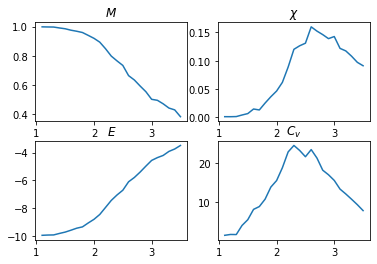

In [8]:
calculator = cal.calculator(samples)
J = sampler.J

M = calculator.magnetization()
plt.subplot(2,2,1)
plt.title('$M$')
plt.plot(T,M)

X = calculator.susceptibility(T)
plt.subplot(2,2,2)
plt.title(r'$\chi$')
plt.plot(T,X)

E = calculator.energy(J)
plt.subplot(2,2,3)
plt.title('$E$')
plt.plot(T,E)

C = calculator.Specific_heat(T, J)
plt.subplot(2,2,4)
plt.title(r'$C_v$')
plt.plot(T,C)
plt.show()

### inference

In [9]:
solver = em.fit()

obtain coupling during  0.4562418460845947


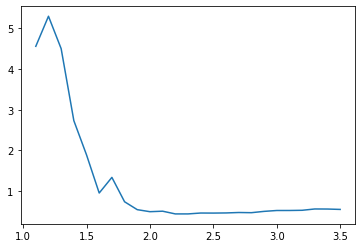

In [12]:
MSE_arr = np.zeros(len(T))
start = time.time()
w_true = solver.J_to_w(sampler.J).to('cuda')

for i,t in enumerate(T):
    config = samples[:,:,i]
    ops = solver.operators(config)
    w_infer = solver.em_gpu(ops)
    MSE_arr[i] = torch.sum((w_infer - w_true)**2) / torch.sum((w_true)**2)
    
print('obtain coupling during ', time.time() - start)

plt.plot(T,MSE_arr)
plt.show()

# SK model

In [21]:
T = np.arange(1.5,0.1,-0.05)
eq_T = 1000
K = 5
M = 1000

N = 25

sampler =  samp.Spin_simulation(N, M, T, eq_T, K)
sampler.adjacency_matrix('SK-model')

In [22]:
start = time.time()
samples = sampler.MC_Sampling()
print('obtain samples during ', time.time() - start)

obtain samples during  93.97110247612


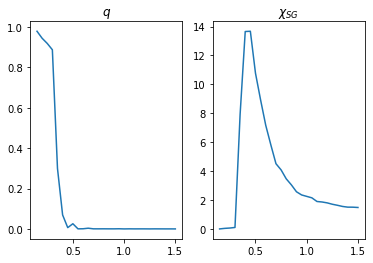

In [24]:
calculator = cal.calculator(samples)
J = sampler.J

q = calculator.Edward_Anderson()
plt.subplot(1,2,1)
plt.title('$q$')
plt.plot(T,q)

X = calculator.SG_susceptibility()
plt.subplot(1,2,2)
plt.title(r'$\chi_{SG}$')
plt.plot(T,X)
plt.show()

### inference

In [25]:
solver = em.fit()

obtain coupling during  0.5151984691619873


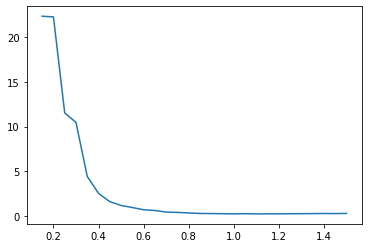

In [26]:
MSE_arr = np.zeros(len(T))
start = time.time()
w_true = solver.J_to_w(sampler.J).to('cuda')

for i,t in enumerate(T):
    config = samples[:,:,i]
    ops = solver.operators(config)
    w_infer = solver.em_gpu(ops)
    MSE_arr[i] = torch.sum((w_infer - w_true)**2) / torch.sum((w_true)**2)
    
print('obtain coupling during ', time.time() - start)

plt.plot(T,MSE_arr)
plt.show()